In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
base_path = os.path.abspath(os.path.join(os.getcwd(), '../../MERI'))
sys.path.append(base_path)
print(base_path)
import deepdoctection as dd
from meri.layout.pipeline_components import (AddPDFInfoComponent, 
                        DummyDetectorComponent, 
                        LayoutDetectorComponent,
                        OCRComponent,
                        DrawingsDetectorComponent,
                        ImageDetectorComponent,
                        TableDetectorComponent,
                        WordUnionComponent,
                        NMSComponent,
                        TextDetectorComponent)
from meri.layout.pipeline import Pipeline
from meri.layout.pipeline_components.utils import ProcessingService, CONFIGS_PATH

from matplotlib import pyplot as plt
from PIL import Image, ImageDraw

/workspaces/MERI


/root/miniconda3/envs/layout_analysis/lib/python3.12/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[0621 07:47.16 @file_utils.py:36]  INF  PyTorch version 2.3.0 available.


In [42]:
from layout_eval.layout_evaluations import LayoutEvaluator 
from utils import *
import json
import os
import sys

base_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(base_path)

In [3]:
pdf_path = f'{base_path}/demo/data/Alfa Laval LKH.pdf'

In [4]:
pipeline_config_path = os.path.abspath(os.path.join(CONFIGS_PATH, 'good_pipeline.yaml'))
print(pipeline_config_path)
pipeline = Pipeline.from_config(cfg_path=pipeline_config_path)
pipeline.build()

dps, page_dicts = pipeline.run(pdf_path)

[0621 07:47.18 @config.py:66]  WRN  Loading config /root/.cache/deepdoctection/configs/dd/d2/layout/CASCADE_RCNN_R_50_FPN_GN.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


/workspaces/MERI/meri/layout/config/good_pipeline.yaml
Running configuration:  <bound method AttrDict.to_dict of {'DEVICE': 'cuda',
 'LIB': 'PT',
 'PT': {'LAYOUT': {'FILTER': ['table', 'figure'],
                   'WEIGHTS': 'layout/d2_model_0829999_layout_inf_only.pt'}}}>


[0621 07:47.21 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...
[0621 07:47.21 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...
You are using a model of type table-transformer to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
[0621 07:47.21 @_builder.py:187]  INF  Loading pretrained weights from Hugging Face hub (timm/resnet18.a1_in1k)


Running configuration:  <bound method AttrDict.to_dict of {'DEVICE': 'cuda',
 'LIB': 'PT',
 'PT': {'LAYOUT': {'FILTER': None,
                   'WEIGHTS': 'microsoft/table-transformer-detection/pytorch_model.bin'}}}>


[0621 07:47.21 @_hub.py:180]  INF  [timm/resnet18.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
[0621 07:47.21 @_builder.py:245]  INF  Missing keys (fc.weight, fc.bias) discovered while loading pretrained weights. This is expected if model is being adapted.
Some weights of the model checkpoint at /root/.cache/deepdoctection/weights/microsoft/table-transformer-detection/pytorch_model.bin were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a Ber

Running configuration:  <bound method AttrDict.to_dict of {'DEVICE': 'cuda',
 'LIB': 'PT',
 'PT': {'LAYOUT': {'FILTER': ['text', 'title', 'list', 'table'],
                   'WEIGHTS': 'layout/d2_model_0829999_layout_inf_only.pt'}}}>


[0621 07:47.22 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...
[0621 07:47.22 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...
[0621 07:47.22 @doctectionpipe.py:84]  INF  Processing Alfa Laval LKH_0.pdf


Building pipeline from components:  [<meri.layout.pipeline_components.add_pdf_info_component.AddPDFInfoComponent object at 0x7f0f753807a0>, <meri.layout.pipeline_components.image_detector_component.ImageDetectorComponent object at 0x7f0f752ca1e0>, <meri.layout.pipeline_components.layout_detection_component.LayoutDetectorComponent object at 0x7f0f75774830>, <meri.layout.pipeline_components.layout_detection_component.LayoutDetectorComponent object at 0x7f0f76a458e0>, <meri.layout.pipeline_components.layout_detection_component.LayoutDetectorComponent object at 0x7f0f751a6f00>, <meri.layout.pipeline_components.nms_component.NMSComponent object at 0x7f0f75676de0>, <meri.layout.pipeline_components.ocr_component.OCRComponent object at 0x7f0f756f27e0>, <meri.layout.pipeline_components.word_union_component.WordUnionComponent object at 0x7f0f75fc6b40>]


[0621 07:47.24 @context.py:126]  INF  AddPDFInfoComponent total: 0.1239 sec.
[0621 07:47.24 @context.py:126]  INF  ImageDetectorComponent total: 0.0544 sec.
/root/miniconda3/envs/layout_analysis/lib/python3.12/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1712608847532/work/aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[0621 07:47.28 @context.py:126]  INF  LayoutDetectorComponent total: 4.32 sec.
[0621 07:47.28 @context.py:126]  INF  LayoutDetectorComponent total: 0.186 sec.
[0621 07:47.28 @context.py:126]  INF  LayoutDetectorComponent total: 0.1292 sec.
[0621 07:47.28 @context.py:126]  INF  NMSComponent total: 0.007 sec.
[0621 07:47.30 @context.py:126]  INF  OCRComponent total: 1.5548 sec.
[0621 07:47.30 @context.py:126]  INF  WordUnionComponent total: 0.0001 sec.
[062

In [5]:
from meri.transformation.transformer import DocumentTransformer, Format
doc_transformer = DocumentTransformer(pdf_path, table_extraction_method='pdfplumber') # or 'llm'
doc_transformer.merge_with_annotations(dps, [dd.LayoutType.figure, dd.LayoutType.table])
doc_transformer.docorate_unmatched_textblocks()

100%|██████████| 4/4 [00:00<00:00, 91.23it/s]


In [6]:
# Load Ground Truth (GT) data from CVAT
pub_annotation_path = f'{base_path}/demo/data/Alfa Laval LKH_anno_text.json'
with open(pub_annotation_path, 'r') as f:
    pub_annotation = json.load(f)
    

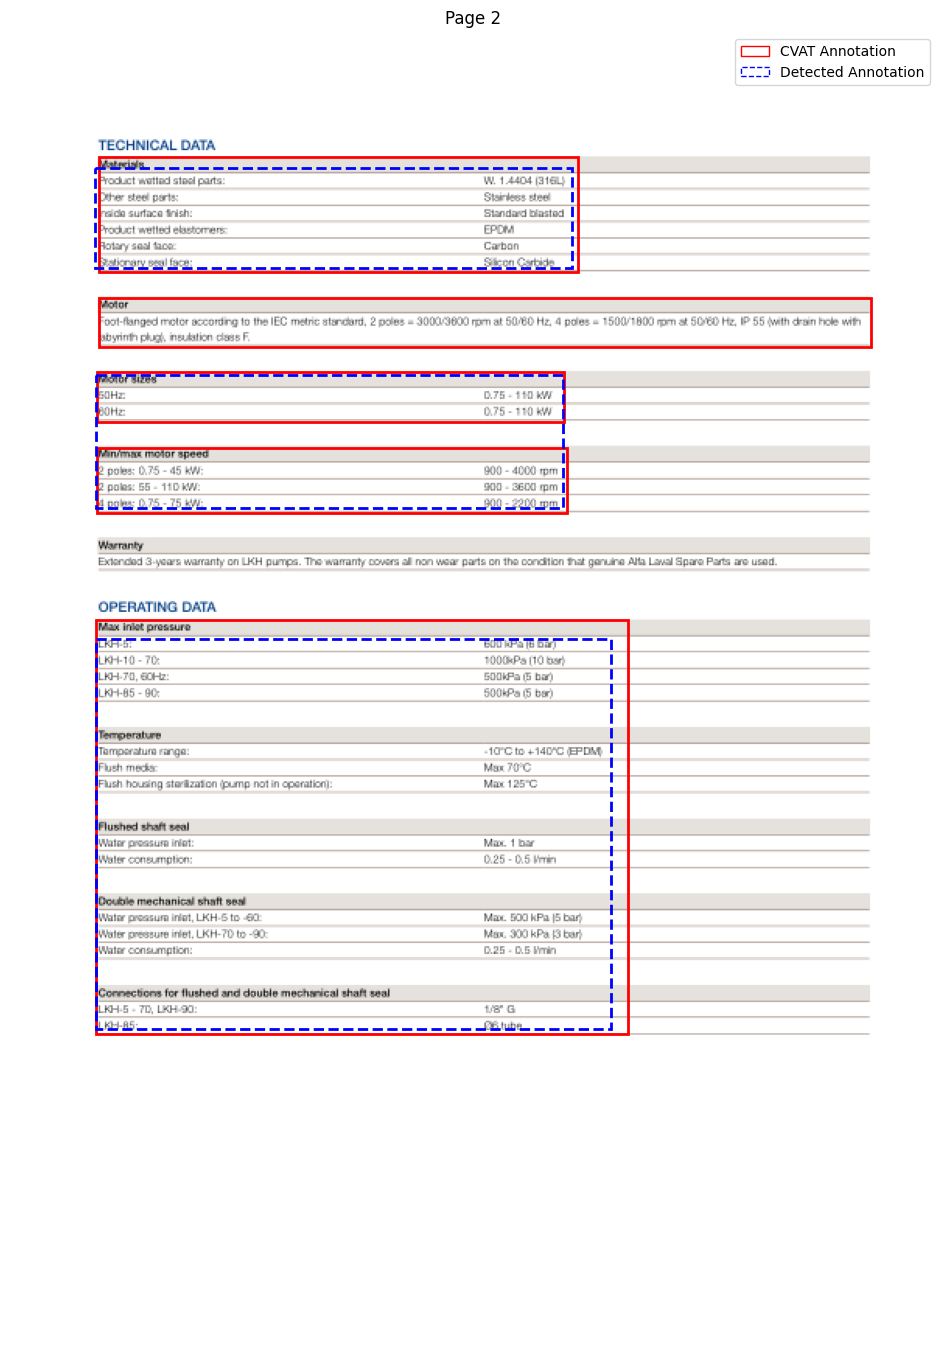

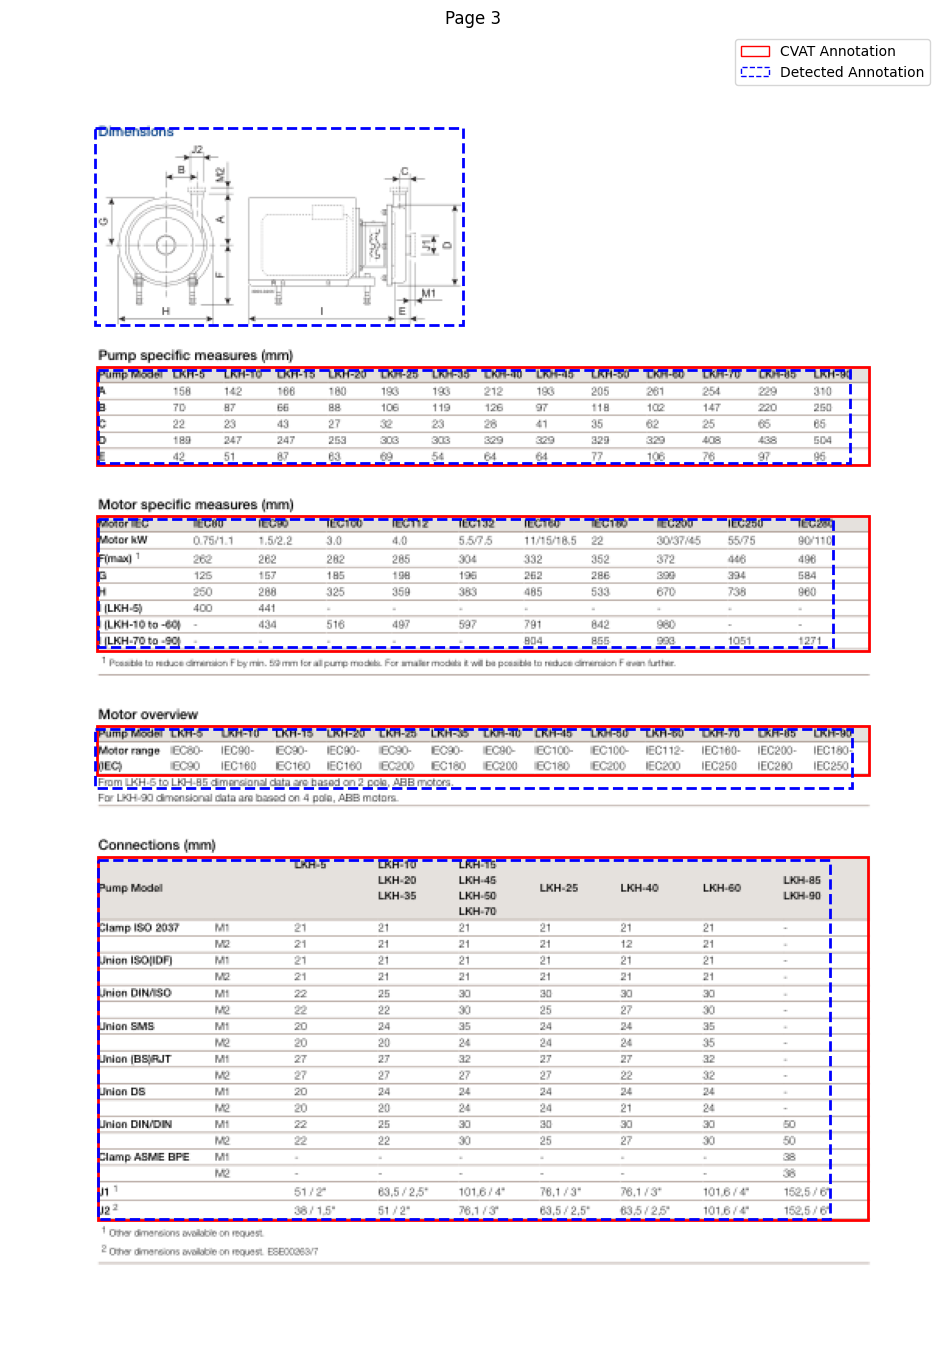

In [43]:
# Load the annotation data
annotation_path = f'{base_path}/demo/data/layout_annotation.json'
layout_evaluator = LayoutEvaluator(pdf_path, annotation_path)
gt = layout_evaluator.ground_truth_bboxes

# Extract detected bounding boxes
detector = layout_evaluator.extract_detected_bboxes(doc_transformer)
output = f'{base_path}/demo/'
pages = [2, 3]
visualize_bboxes_on_pdf(pdf_path, gt, detector, output, pages)

In [45]:
# # Compare bounding boxes and get results
# overlap, comparison = layout_evaluator.compare_bounding_boxes()

# # Print overlap results
# print(overlap)

# # Calculate and print mean IOU
# mean_iou = layout_evaluator.calculate_mean_iou(comparison)
# print(f'Mean IOU: {mean_iou}')

# # Calculate and print mAP
# map_score = layout_evaluator.calculate_map(comparison)
# print(f'mAP: {map_score}')


In [46]:
# Compare bounding boxes and get results
overlap, comparison = layout_evaluator.compare_bounding_boxes()
overlap

[{'pdf_page_num': 2,
  'cvat_page_num': 2,
  'iou': 0.8524881938256985,
  'pdf_bbox': [54.0, 87.0, 361.0, 151.0],
  'cvat_bbox': [157.09, 222.89, 1013.75, 427.4]},
 {'pdf_page_num': 2,
  'cvat_page_num': 2,
  'iou': 0.9113019071480253,
  'pdf_bbox': [55.0, 390.0, 386.0, 641.0],
  'cvat_bbox': [152.6, 1049.5, 1103.8999999999999, 1789.3]},
 {'pdf_page_num': 3,
  'cvat_page_num': 3,
  'iou': 0.9000357466921272,
  'pdf_bbox': [56.0, 313.0, 529.0, 395.0],
  'cvat_bbox': [153.68, 863.9, 1534.55, 1104.81]},
 {'pdf_page_num': 3,
  'cvat_page_num': 3,
  'iou': 0.9403024841227582,
  'pdf_bbox': [56.0, 532.0, 527.0, 763.0],
  'cvat_bbox': [155.03, 1472.2, 1531.86, 2120.95]},
 {'pdf_page_num': 3,
  'cvat_page_num': 3,
  'iou': 0.9278584132852172,
  'pdf_bbox': [56.0, 217.00000000000003, 540.0, 277.0],
  'cvat_bbox': [153.68, 597.42, 1534.6000000000001, 772.38]},
 {'pdf_page_num': 3,
  'cvat_page_num': 3,
  'iou': 0.7063296001401461,
  'pdf_bbox': [54.0, 448.0, 541.0, 486.0],
  'cvat_bbox': [153.68

In [47]:
def print_detailed_bboxes_info(comparison_results):
    for result in comparison_results:
        print(f"PDF Page: {result['pdf_page_num']}, CVAT Page: {result['cvat_page_num']}")
        print(f"PDF BBox: {result['pdf_bbox']}")
        print(f"CVAT BBox: {result['cvat_bbox']}")
        print(f"IOU: {result['iou']}\n")

print_detailed_bboxes_info(comparison)

PDF Page: 2, CVAT Page: 2
PDF BBox: [54.0, 87.0, 361.0, 151.0]
CVAT BBox: [157.09, 222.89, 1013.75, 427.4]
IOU: 0.8524881938256985

PDF Page: 2, CVAT Page: 2
PDF BBox: [55.0, 219.99999999999997, 354.99999999999994, 306.0]
CVAT BBox: [153.95, 741.29, 993.78, 858.38]
IOU: 0.438031797663747

PDF Page: 2, CVAT Page: 2
PDF BBox: [55.0, 390.0, 386.0, 641.0]
CVAT BBox: [152.6, 1049.5, 1103.8999999999999, 1789.3]
IOU: 0.9113019071480253

PDF Page: 3, CVAT Page: 3
PDF BBox: [56.0, 313.0, 529.0, 395.0]
CVAT BBox: [153.68, 863.9, 1534.55, 1104.81]
IOU: 0.9000357466921272

PDF Page: 3, CVAT Page: 3
PDF BBox: [56.0, 532.0, 527.0, 763.0]
CVAT BBox: [155.03, 1472.2, 1531.86, 2120.95]
IOU: 0.9403024841227582

PDF Page: 3, CVAT Page: 3
PDF BBox: [56.0, 217.00000000000003, 540.0, 277.0]
CVAT BBox: [153.68, 597.42, 1534.6000000000001, 772.38]
IOU: 0.9278584132852172

PDF Page: 3, CVAT Page: 3
PDF BBox: [54.0, 448.0, 541.0, 486.0]
CVAT BBox: [153.68, 1238.06, 1534.55, 1325.54]
IOU: 0.7063296001401461



In [48]:
# Calculate mean IOU
mean_iou = layout_evaluator.calculate_mean_iou(comparison)
print(f'Mean IOU: {mean_iou}')

# Calculate mAP
map_score = layout_evaluator.calculate_map(comparison)
print(f'mAP: {map_score}')

Mean IOU: 0.81090687755396
IOU Threshold: 0.5
True Positives: 6
False Positives: 1
False Negatives: 3
Precision: 0.8571428571428571
Recall: 0.6666666666666666
IOU Threshold: 0.55
True Positives: 6
False Positives: 1
False Negatives: 3
Precision: 0.8571428571428571
Recall: 0.6666666666666666
IOU Threshold: 0.6
True Positives: 6
False Positives: 1
False Negatives: 3
Precision: 0.8571428571428571
Recall: 0.6666666666666666
IOU Threshold: 0.65
True Positives: 6
False Positives: 1
False Negatives: 3
Precision: 0.8571428571428571
Recall: 0.6666666666666666
IOU Threshold: 0.7
True Positives: 6
False Positives: 1
False Negatives: 3
Precision: 0.8571428571428571
Recall: 0.6666666666666666
IOU Threshold: 0.75
True Positives: 5
False Positives: 2
False Negatives: 4
Precision: 0.7142857142857143
Recall: 0.5555555555555556
IOU Threshold: 0.8
True Positives: 5
False Positives: 2
False Negatives: 4
Precision: 0.7142857142857143
Recall: 0.5555555555555556
IOU Threshold: 0.85
True Positives: 5
False Po

In [49]:
import pandas as pd
comparison_df = pd.DataFrame(comparison)
# Show only for comparison_df where iou is not 0
comparison_df[comparison_df['iou'] != 0]

,pdf_page_num,cvat_page_num,iou,pdf_bbox,cvat_bbox
0,2,2,0.852488,"[54.0, 87.0, 361.0, 151.0]","[157.09, 222.89, 1013.75, 427.4]"
1,2,2,0.438032,"[55.0, 219.99999999999997, 354.99999999999994,...","[153.95, 741.29, 993.78, 858.38]"
2,2,2,0.911302,"[55.0, 390.0, 386.0, 641.0]","[152.6, 1049.5, 1103.8999999999999, 1789.3]"
3,3,3,0.900036,"[56.0, 313.0, 529.0, 395.0]","[153.68, 863.9, 1534.55, 1104.81]"
4,3,3,0.940302,"[56.0, 532.0, 527.0, 763.0]","[155.03, 1472.2, 1531.86, 2120.95]"
5,3,3,0.927858,"[56.0, 217.00000000000003, 540.0, 277.0]","[153.68, 597.42, 1534.6000000000001, 772.38]"
6,3,3,0.706330,"[54.0, 448.0, 541.0, 486.0]","[153.68, 1238.06, 1534.55, 1325.54]"


In [53]:
# Filter the bounding boxes to include only pages 2 and 3
filtered_detected_bboxes = [bbox for bbox in detector if bbox[0] in [2, 3]]
filtered_ground_truth_bboxes = [bbox for bbox in gt if bbox[0] in [2, 3]]
filtered_ground_truth_bboxes = [bbox for bbox in layout_evaluator.ground_truth_bboxes if bbox[0] in [2, 3]]



# calculate precision and recall at IOU threshold of 0.5
# precision, recall = LayoutEvaluator.calculate_precision_recall(comparison, filtered_ground_truth_bboxes, 0.5)
# Calculate precision and recall at IOU threshold of 0.5
precision, recall = layout_evaluator.calculate_precision_recall(comparison, 0.5)
print(f"Precision: {precision}, Recall: {recall}")


IOU Threshold: 0.5
True Positives: 6
False Positives: 1
False Negatives: 3
Precision: 0.8571428571428571
Recall: 0.6666666666666666
Precision: 0.8571428571428571, Recall: 0.6666666666666666


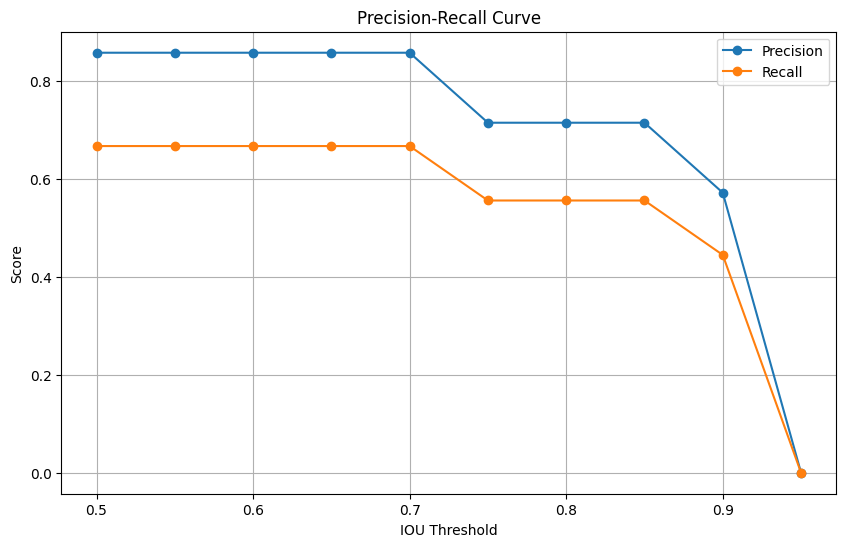

In [52]:

plot_precision_recall_curve(comparison, filtered_ground_truth_bboxes)
